In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install or upgrade the necessary libraries.

In [2]:
!pip install GPUtil

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=dd51704ef4ae5e9caade5e0f7d523f1921e6fc030b7fa6f4907b4251f74f6e54
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil


In [3]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [4]:
%cd /content/drive/MyDrive/projet thouvenin/ZSSR_group_work

/content/drive/MyDrive/projet thouvenin/ZSSR_group_work


Import everything needed

In [5]:
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import configs
import run_ZSSR
import run_ZSSR_single_input
import ZSSR
import imresize
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

Use this function to use ZSSR and get the numpy array of the augmented image. Parameters are:

- configs from the list below
- 'all' if you have a GPU or None if not
- If you want to make the algorithm run on a single image you can give its path directly, else let this be an empty string

(Pour information, la 'true mse' est calculable uniquement lorsque qu'une image 'ground truth' correspondante est trouvée.)

In [6]:
#config list: None, X2_IDEAL_WITH_PLOT_CONF, X2_ONE_JUMP_IDEAL_CONF, X2_GRADUAL_IDEAL_CONF, X2_GIVEN_KERNEL_CONF,X2_REAL_CONF

s=run_ZSSR.main(None,'all','')

Le dossier existe déjà.
['/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres.png', '/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/gibbon.png']
no kernel loaded
['/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_0.mat;']
starting process with gpu
*****


Instructions for updating:
Use `tf.global_variables_initializer` instead.


** Start training for sf= [2.0, 2.0]  **
sf: [2. 2.] , iteration:  0 , loss:  0.005553433
iteration:  0 reconstruct mse: 0.00093437865 , true mse: 0.00094070827
sf: [2. 2.] , iteration:  20 , loss:  0.022612473
sf: [2. 2.] , iteration:  40 , loss:  0.0
iteration:  50 reconstruct mse: 0.00093128637 , true mse: 0.0009389873
sf: [2. 2.] , iteration:  60 , loss:  0.013739177
sf: [2. 2.] , iteration:  80 , loss:  0.033801094
sf: [2. 2.] , iteration:  100 , loss:  0.027416235
iteration:  100 reconstruct mse: 0.00089512015 , true mse: 0.0009174577
sf: [2. 2.] , iteration:  120 , loss:  0.011192516
sf: [2. 2.] , iteration:  140 , loss:  0.0
iteration:  150 reconstruct mse: 0.0008341389 , true mse: 0.0008773241
sf: [2. 2.] , iteration:  160 , loss:  0.0
sf: [2. 2.] , iteration:  180 , loss:  0.0044784886
sf: [2. 2.] , iteration:  200 , loss:  0.016025549
iteration:  200 reconstruct mse: 0.00090546947 , true mse: 0.0009223522
sf: [2. 2.] , iteration:  220 , loss:  0.017755104
sf: [2. 2.] , itera

Here we reduce a ground truth image and then run the algorithm on it directly.

In [6]:
#given an image, downgrade it and then upgrade it using ZSSR
#import cv2
img= cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_gt.png')

#downgrade the image
downgraded_img = imresize.imresize(img,0.5)

#save the downgraded image
cv2.imwrite('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_bis.jpg',downgraded_img)

s=run_ZSSR.main(None,'all','/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_bis.jpg')



Le dossier existe déjà.
['/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_bis.jpg']
no kernel loaded
['/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/ministres_bis_0.mat;']
starting process with gpu
*****


Instructions for updating:
Use `tf.global_variables_initializer` instead.


** Start training for sf= [2.0, 2.0]  **
sf: [2. 2.] , iteration:  0 , loss:  0.0067899846
iteration:  0 reconstruct mse: 16337.969 , true mse: None
sf: [2. 2.] , iteration:  20 , loss:  0.0001864352
sf: [2. 2.] , iteration:  40 , loss:  0.006747616
iteration:  50 reconstruct mse: 16337.969 , true mse: None
sf: [2. 2.] , iteration:  60 , loss:  0.0
sf: [2. 2.] , iteration:  80 , loss:  7.275958e-12
sf: [2. 2.] , iteration:  100 , loss:  0.0013034772
iteration:  100 reconstruct mse: 16337.969 , true mse: None
sf: [2. 2.] , iteration:  120 , loss:  0.0010922021
sf: [2. 2.] , iteration:  140 , loss:  0.0011573456
iteration:  150 reconstruct mse: 16337.969 , true mse: None
sf: [2. 2.] , iteration:  160 , loss:  0.0
sf: [2. 2.] , iteration:  180 , loss:  0.0071286545
sf: [2. 2.] , iteration:  200 , loss:  6.063298e-12
iteration:  200 reconstruct mse: 16337.969 , true mse: None
sf: [2. 2.] , iteration:  220 , loss:  0.008302949
sf: [2. 2.] , iteration:  240 , loss:  0.0
iteration:  250 recon

Computing PSNR and SSIM score with ground truth.

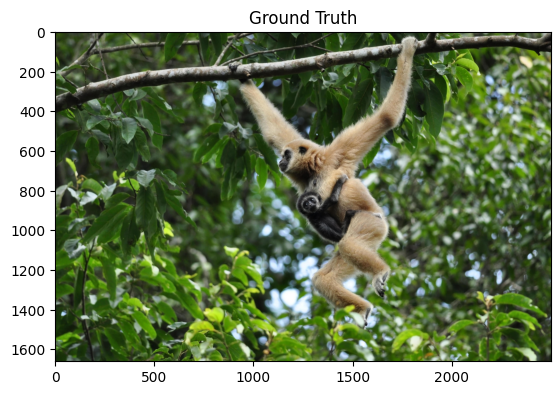

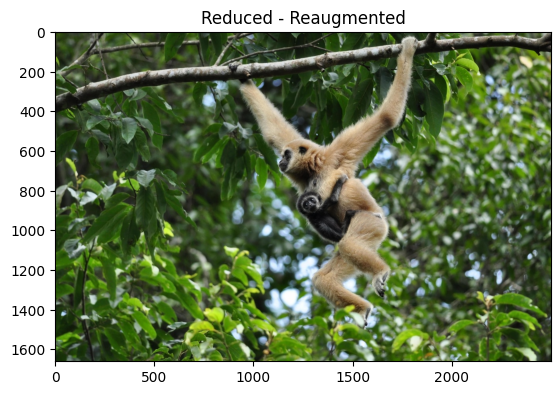

psnr zssr: 38.572946205985275
ssim zssr: 0.9612039903491686


In [8]:

#use those metrics to compare the zssr-image and downgraded one to the original image

img= cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/gibbon_gt.jpg',cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2=cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/results/result/gibbon_zssr_X2.00X2.00.png',cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#show the images
plt.imshow(img)
plt.title('Ground Truth')
plt.show()
plt.imshow(img2)
plt.title('Reduced - Reaugmented')
plt.show()


psnr_zssr = psnr(img,img2)

print('psnr zssr:',psnr_zssr)

ssim_zssr = ssim(img,img2,channel_axis=2)

print('ssim zssr:',ssim_zssr)

Compute the best patch, and then the 5 best patches.

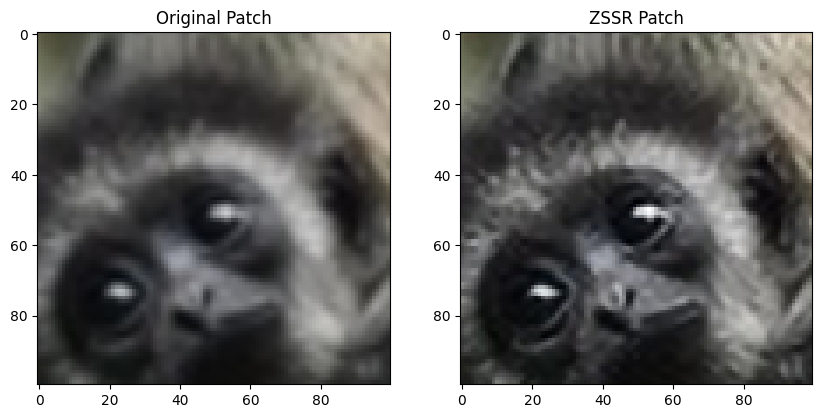

In [11]:

# Load the images
img_original = cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/gibbon.png')
img_zssr = cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/results/result/gibbon_zssr_X2.00X2.00.png')
img_original=cv2.resize(img_original,(img_zssr.shape[1],img_zssr.shape[0]))



# Convert images to grayscale
img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_zssr_gray = cv2.cvtColor(img_zssr, cv2.COLOR_BGR2GRAY)

# Compute absolute difference
abs_diff = cv2.absdiff(img_original_gray, img_zssr_gray)

# Find the region with the highest differences
max_diff_indices = np.unravel_index(np.argmax(abs_diff), abs_diff.shape)
patch_size = 100
top_left_x = max_diff_indices[1] - patch_size // 2
top_left_y = max_diff_indices[0] - patch_size // 2

# Crop the patches from both images
patch_original = img_original[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :]
patch_zssr = img_zssr[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :]

# Plot the patches
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(patch_original, cv2.COLOR_BGR2RGB))
plt.title('Original Patch')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(patch_zssr, cv2.COLOR_BGR2RGB))
plt.title('ZSSR Patch')

plt.show()


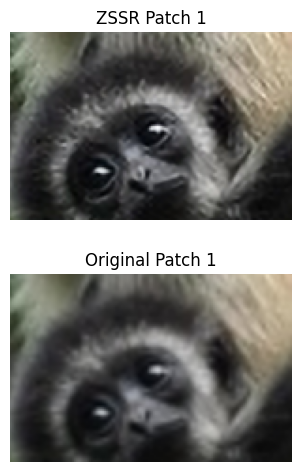

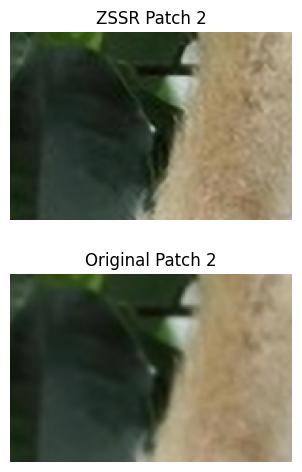

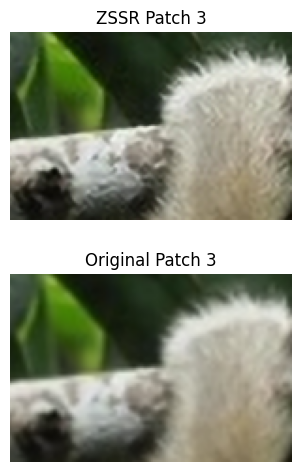

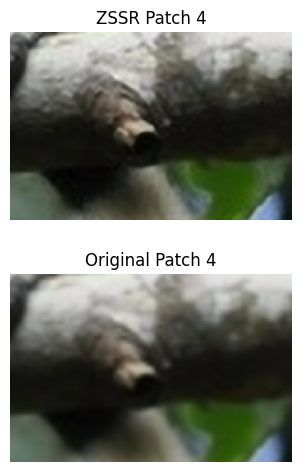

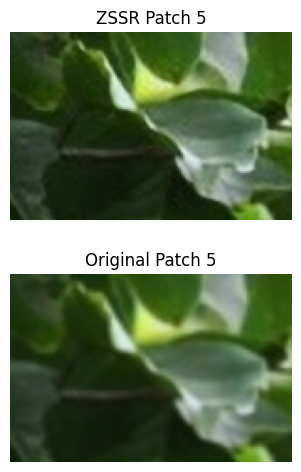

In [13]:

def find_top_n_patches(abs_diff, n_patches, patch_size):
    top_n_patches = []
    for _ in range(n_patches):
        max_diff_index = np.unravel_index(np.argmax(abs_diff), abs_diff.shape)
        top_left_x = max_diff_index[1] - patch_size[1] // 2
        top_left_y = max_diff_index[0] - patch_size[0] // 2
        patch = abs_diff[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1]]
        top_n_patches.append(((top_left_y, top_left_x), patch))
        # Set the region around the found patch to zero to avoid selecting it again
        abs_diff[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1]] = 0
    return top_n_patches

# Load the images
img_original = cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/test_data/gibbon.png')
img_zssr = cv2.imread('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/results/result/gibbon_zssr_X2.00X2.00.png')

img_original=cv2.resize(img_original,(img_zssr.shape[1],img_zssr.shape[0]))

# Convert images to grayscale
img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_zssr_gray = cv2.cvtColor(img_zssr, cv2.COLOR_BGR2GRAY)

# Compute absolute difference
abs_diff = cv2.absdiff(img_original_gray, img_zssr_gray)

# Parameters
n_patches = 5
patch_size = (100, 150)  # height, width

# Find the top n patches
top_n_patches = find_top_n_patches(abs_diff, n_patches, patch_size)

# Plot the patches
for i, ((top_left_y, top_left_x), patch) in enumerate(top_n_patches):
    plt.figure(figsize=(15, 5))
    plt.subplot(2, n_patches, n_patches + i + 1)
    patch_original = img_original[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1], :]
    patch_zssr = img_zssr[top_left_y:top_left_y + patch_size[0], top_left_x:top_left_x + patch_size[1], :]
    plt.imshow(cv2.cvtColor(patch_original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Patch {i+1}')
    plt.axis('off')
    plt.subplot(2, n_patches, i + 1)
    plt.imshow(cv2.cvtColor(patch_zssr, cv2.COLOR_BGR2RGB))
    plt.title(f'ZSSR Patch {i+1}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    cv2.imwrite('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/results/test_Mar_05_09_28_40/gibbon_patch_zssr_' + str(i) + '.png',patch_zssr)
    cv2.imwrite('/content/drive/MyDrive/projet thouvenin/ZSSR_group_work/results/test_Mar_05_09_28_40/gibbon_patch_og_' + str(i) + '.png',patch_original)
